# <노인복지센터 현황 시각화 프로젝트> &#128214;
	
## &#10047;	 라이브러리 호출

In [2]:
import os
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# matplotlib의 한글문제를 해결
from matplotlib import font_manager, rc 
%matplotlib inline 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) # font_name


os.getcwd() # 경로 확인
os.chdir('C:\\Users\\세지쨩\\Programming\\Project\\senior-welfare') # 경로 설정


## PART 1. 노인복지센터 현황 파악
### 1) 60세 이상 인구증가 추이 그래프 

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1.0, '60세 이상 인구 증가 추이')

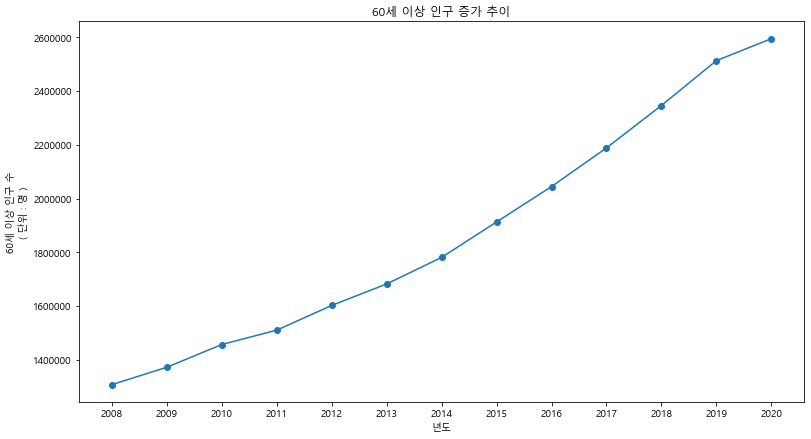

In [3]:
# 1. 데이터 불러오기
age = pd.read_csv('주민등록인구집계현황.csv', sep=',', encoding='euc-kr')
 
# 2. 공백 제거 ('경기도    ' 제거)
age['행정구역명'] = age['행정구역명'].str.strip() 

# 3. 경기도 총합 부분만 가져오기(구역별로 나눠져 있는 부분 제외)
age1 = age[age.행정구역명 == '경기도']

# 4. 연도,월, 60세이상
o_age = age1.iloc[:,[0,1,11,12,13,14,15]]

# y_age = age1.iloc[:,[0,1,5,6,7,8]] # 유아, 청년층
# m_age = age1.iloc[:,[0,1,9,10]] # 중년층

# 5. 60세이상인구 합계
o_age['60세이상'] = o_age.iloc[:,2:].sum(1)

# 6. 년도별 60세이상인구 합계 추출
# 2008~2019년 : 12월 (1~12월 누적데이터 -> 각 년도별 최신 데이터인 12월을 추출)
# 2020년 : 5월 

o_age1 = o_age[o_age['월'] == 12]  # 2008 ~2019
plus = pd.DataFrame([o_age[o_age['연도'] == 2020].iloc[0,:]])  # 2020 (DataFrame형태 맞추기)

# 7. 2008~2019년의 각 12월과 2020년 5월 데이터 합치기
o_age2 = pd.concat([o_age1, plus],ignore_index=True,axis=0)
# o_age2.sort_values('연도')


# 8. 년도별 정렬
o_age3 = o_age2.iloc[:,[0,-1]].sort_values('연도')

# 9. 그래프그리기 x,y 축 설정
x_val = o_age3['연도']
y_val = o_age3['60세이상']
 
# 10. 그래프 그리기

x_val = o_age3['연도']
y_val = o_age3['60세이상']

plt.rcParams['figure.figsize'] = [13, 7] # 그래프 크기(figure) 사이즈 조정
plt.plot(x_val, y_val, marker = 'o')
plt.xlabel('년도')
plt.xticks(np.arange(2008, 2021, step=1))  # x축 전체 표시
plt.ylabel('60세 이상 인구 수\n( 단위 : 명 )')
plt.title('60세 이상 인구 증가 추이')

***

### 2) 시군별 기관 수 

In [10]:
# 1. 데이터 불러오기
jumin = pd.read_csv('주민등록인구집계현황.csv', sep=',', encoding='euc-kr')
n_d = pd.read_csv('노인돌봄서비스수행기관현황.csv', sep=',', encoding='euc-kr')
n_g = pd.read_csv('노인여가복지시설현황(경로당).csv', sep=',', encoding='euc-kr')
n_b = pd.read_csv('노인여가복지시설현황(노인복지관).csv', sep=',', encoding='euc-kr')
n_m = pd.read_csv('무한돌봄센터현황.csv', sep=',', encoding='euc-kr')
n_j = pd.read_csv('재가노인복지시설현황.csv', sep=',', encoding='euc-kr')

# 2. 시군구별 센터 수 파악
n_d_count = n_d.groupby('시군명')['서비스구분명'].count() # 시군구별 노인돌봄기관 센터 수

n_g_count = n_g.groupby('시군명')['시설명'].count() # 시군구별 경로당 수

# n_b
n_b_count = n_b.groupby('시군명')['시설명'].count() # 시군구별 노인복지관 수
n_b_count

# n_m.head()
n_m_count = n_m.groupby('시군명')['센터명'].count() # 시군구별 무한돌봄센터 수
n_m_count

# n_j.head()
n_j_count = n_j.groupby('시군구명')['시설명'].count() # 시군구별 재가노인복지시설 수
n_j_count.index = n_j_count.index.str.split(' ').str[0]
n_j_count = n_j_count.groupby('시군구명').count()
# n_j_count

# 3. 데이터 합치기
md1 = pd.merge(n_d_count,n_g_count,how='outer', left_index=True,right_index=True)
md2 = pd.merge(md1,n_b_count,how='outer', left_index=True,right_index=True)
md3 = pd.merge(md2,n_m_count,how='outer', left_index=True,right_index=True)
md4 = pd.merge(md3,n_j_count,how='outer', left_index=True,right_index=True)
md4

# 4. 컬럼명 변경 
md5 = md4.rename(columns = {'서비스구분명':'돌봄서비스기관', '시설명_x':'경로당','시설명_y':'노인복지관',
                            '센터명':'무한돌봄센터','시설명':'재가노인복지시설'})

# 5. 결측치 처리
md5
md6 = md5.fillna(0)

# 6. 시군별 노인복지시설 수(final) 
md6

# 7. dtypes 통일
md6['노인복지관'] = md6['노인복지관'].astype('int64')
md6

,돌봄서비스기관,경로당,노인복지관,무한돌봄센터,재가노인복지시설
시군명,,,,,
가평군,7,164,1,1,1
고양시,18,553,3,1,2
과천시,2,27,1,1,1
광명시,7,116,1,1,1
광주시,16,276,1,1,1
구리시,12,126,0,1,1
군포시,14,114,2,1,1
김포시,13,319,2,1,1
남양주시,11,515,3,1,1


-----------

### 3) 연도별 12월 인구수 

In [4]:
# 누적인구이므로 각 연도별 12월을 추출

# 1. 경기도 인구수 csv파일 불러오기
df = pd.read_csv('주민등록인구집계현황.csv', encoding='cp949') # encodimg='utf-8' 하면 에러가 나기 때문에 cp949를 해줘야 함
df.head()

# 2. 원하는 열만 가져와서 df 다시 생성
df_test = df[['연도','월','행정구역구분명','행정구역명','총 인구수','0~9세','10~19세','20~29세','30~39세','40~49세','50~59세','60~69세','70~79세','80~89세','90~99세',]]
df_test

# 3. df에서 행정구역 구분명을 통해 '도' 또는 '시군' 만 가져와서 인구수 확인
df_do = df_test[ (df_test['행정구역구분명']=='도') | (df_test['행정구역구분명']=='시군') ]
df_do

# 4. 각 연도별 12월달의 인구수를 확인
df_year = df_do[ (df_do['연도']==2020) & (df_do['월']== 5) ]
df_year

# 5. 연도를 set으로  만들어서 같은 값들을 제거하고 다시 list 형식으로 바꾸어 year에 저장
year = list(set(df_do['연도']))

# 6. 2020년은 5월 까지 밖에 없어서 for문과 if를 통해 excel 파일로 저장
for i in year:
    try:
        print(i)
        if i != 2020:
            df_year = df_do[(df_do['연도']== i) & (df_do['월'] == 12)]
        else :
            df_year = df_do[(df_do['연도']== i) & (df_do['월'] == 5)]
            
        df_year.to_excel('result_{}.xlsx'.format(i), index=False, encoding='cp949')
        print('파일저장 완료')
    except:
        print('실패')

2016
파일저장 완료
2017
파일저장 완료
2018
파일저장 완료
2019
파일저장 완료
2020
파일저장 완료
2008
파일저장 완료
2009
파일저장 완료
2010
파일저장 완료
2011
파일저장 완료
2012
파일저장 완료
2013
파일저장 완료
2014
파일저장 완료
2015
파일저장 완료


--------------------

### 4) 노인 인구수 대비 복지시설 히트맵

C:\Users\4\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\4\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


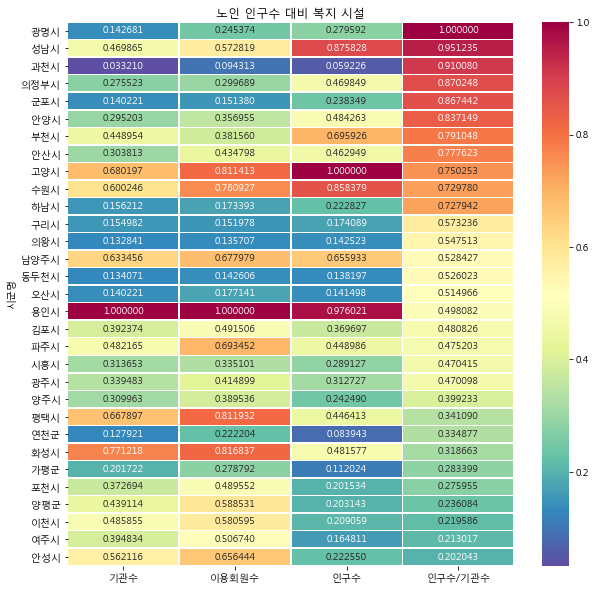

In [12]:
# < 히트맵 >
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc # rc == run configure(configuration file)
import os
os.chdir('C:/Users/4/Bdata')
%matplotlib inline

# df_1 : 노인여가복지시설(경로당)

# 1. 파일 읽기
df_1 = pd.read_csv('노인여가복지시설현황(경로당).csv', encoding='cp949')
df_1.head()

# 2. '시군명'과 '이용회원수'만 가져오기
df_new = df_1[['시군명', '이용회원수']]

# 3. '기관수' 행을 추가하고 1로 설정
df_new['기관수']=1

# 4. '시군명'을 기준으로 합계 계산
pivot_df = pd.pivot_table(df_new, index='시군명', aggfunc=sum)

# 5. 파일 읽기 - 노인인구수 테이블 / df_3: 노인 인구수
df_3 = pd.read_excel('result_노인인구수_2020.xlsx', encoding='cp949')
df_3.head()
df_3 = df_3.drop([0])

# 6.'행정구역명'과 '70세'이상인 열만 가져오기
pivot_df2 = df_3[['행정구역명' ,'70~79세', '80~89세', '90~99세']]

# 7. 행을 기준으로 합계 구하고 열 추가
# 70+이상의 노인 인구수의 합계 구하기
pivot_df2['Total'] = pivot_df2.sum(axis=1)
pivot_df2 = pivot_df2[['행정구역명' , 'Total']]

# 8. pivot_df2(인구수)의 'Total' 열을 pivot_df(시설수와 이용자수)에 복사하기
# 'Total' 열의 값을 리스트로 저장
totalli = pivot_df2.Total.tolist()
pivot_df['인구수'] = totalli

# 9. 비율로 나누기 (인구수/기관수)
# '인구수'열을 '기관수'열로 나눈 리스트를 pivot_df에 저장
divDF = pivot_df['인구수'] / pivot_df['기관수']
pivot_df['인구수/기관수'] = list(divDF)

# 10. max값으로 나눠주기
weight_col = pivot_df[['기관수', '이용회원수', '인구수','인구수/기관수']].max()
finalDF= pivot_df[['기관수', '이용회원수', '인구수', '인구수/기관수']] / weight_col
finalDF

# 11. HEATMAP 만들기
import seaborn as sns
%matplotlib inline 
from matplotlib import font_manager, rc # rc == run configure(configuration file)

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.figure(figsize = (10, 10))

# cmap : matplotlib colormap @ https://goo.gl/YWpBES
sns.heatmap(finalDF.sort_values(by='인구수/기관수', ascending=False), 
            annot=True, fmt='f', linewidths=.5, cmap='Spectral_r')

plt.title('노인 인구수 대비 복지 시설')
plt.show()

--------------